# Dataset

In [ ]:
!gdown 1FbeiuQmJibsEP3RyvZi60MiZ1ZFNFr1x #Extended recommendation-by-explanation
!gdown 1bUBJE7C8PzOT2XrUZrAgVbCWNFY8WuSN

In [ ]:
!unzip dataset.zip

In [ ]:
import pandas as pd
df_foreign_key = pd.read_csv('movies_data.csv') # code é a coluna do id dos filmes com o imdb
df_rating = pd.read_csv('/content/dataset/1851_movies_ratings.txt', sep='\t', names=['user','item','rating']) # code é a coluna do id dos filmes com o imdb

In [ ]:
df_5 = df_rating[df_rating.rating == 5.0]
df_1 = df_rating[df_rating.rating == 1.0]

In [ ]:
df_5

,user,item,rating
1,8194,3968,5.0
8,16389,3345,5.0
9,16389,2816,5.0
37,16389,3845,5.0
43,16389,4918,5.0
...,...,...,...
256014,49143,4945,5.0
256017,49148,2769,5.0
256018,49148,5908,5.0
256019,49148,4965,5.0


In [ ]:
df_1

,user,item,rating
98843,16389,4407,1.0
98886,16389,6059,1.0
98896,16389,3127,1.0
98902,16389,6043,1.0
98953,24592,4022,1.0
...,...,...,...
289668,69625,6575,1.0
289680,65500,5299,1.0
289718,8168,3343,1.0
289740,8168,6059,1.0


In [ ]:
df_foreign_key

,movie_id,code,title,year,imdb
0,4892,290879,The Legend of Suriyothai,2001.0,http://www.imdb.com/title/tt0290879/
1,3213,212380,Blow Dry,2001.0,http://www.imdb.com/title/tt0212380/
2,4887,296042,Ichi the Killer,2001.0,http://www.imdb.com/title/tt0296042/
3,3994,282768,The Emperor's New Clothes,2001.0,http://www.imdb.com/title/tt0282768/
4,3522,265029,America's Sweethearts,2001.0,http://www.imdb.com/title/tt0265029/
...,...,...,...,...,...
3663,6992,249248,Wings of Hope,NaN,http://www.imdb.com/title/tt0249248/
3664,7003,228528,Little Richard,NaN,http://www.imdb.com/title/tt0228528/
3665,7410,238883,Brother 2,NaN,http://www.imdb.com/title/tt0238883/
3666,8348,212235,Shriek If You Know What I Did Last Friday the ...,NaN,http://www.imdb.com/title/tt0212235/


# Dataset IMDB


In [ ]:
!gdown 1nUF3kIBqy_ZqGHvbEQCho1sANx8x_Nb4
!gdown 1NT3EkfTAP6w1PkUp_9wA2OxoZp4LPPcj

Downloading...
From: https://drive.google.com/uc?id=1nUF3kIBqy_ZqGHvbEQCho1sANx8x_Nb4
To: /content/keywords.csv
100% 6.23M/6.23M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NT3EkfTAP6w1PkUp_9wA2OxoZp4LPPcj
To: /content/movies_metadata.csv
100% 34.4M/34.4M [00:00<00:00, 155MB/s]


In [ ]:
df_keywords = pd.read_csv('keywords.csv')
df_movies = pd.read_csv('movies_metadata.csv').drop(index = [19730,29503,35587])
df_movies['genres'] = df_movies['genres'].apply(eval)
df_keywords['keywords'] = df_keywords['keywords'].apply(eval)

# Merged Dataset

## Add keywords, genres and overview

In [ ]:
l_genre = []
l_overview = []
l_keywords = []

drops = []
for index,row in df_foreign_key.iterrows():
  id_imdb = 'tt0' + str(row.code)

  if id_imdb in df_movies.imdb_id.unique():
    genres = df_movies[df_movies.imdb_id == id_imdb]['genres'].iloc[0]
    overview = df_movies[df_movies.imdb_id == id_imdb]['overview'].iloc[0]
    id_df_movies = df_movies[df_movies.imdb_id == id_imdb]['id'].iloc[0]
    keywrods = df_keywords[df_keywords.id == int(id_df_movies)]['keywords'].iloc[0]
    
    l_genre.append(genres)
    l_overview.append(overview)
    l_keywords.append(keywrods)
  else:
    drops.append(index)

df_foreign_key = df_foreign_key.drop(index=drops)

df_foreign_key['genres'] = l_genre
df_foreign_key['overview'] = l_overview
df_foreign_key['keywords'] =l_keywords

In [ ]:
df_foreign_key

,movie_id,code,title,year,imdb,genres,overview,keywords
0,4892,290879,The Legend of Suriyothai,2001.0,http://www.imdb.com/title/tt0290879/,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...","During the 16th century, as Thailand contends ...","[{'id': 2011, 'name': 'queen'}, {'id': 3434, '..."
1,3213,212380,Blow Dry,2001.0,http://www.imdb.com/title/tt0212380/,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",The annual British Hairdressing Championship c...,"[{'id': 10183, 'name': 'independent film'}]"
2,4887,296042,Ichi the Killer,2001.0,http://www.imdb.com/title/tt0296042/,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",As sadomasochistic yakuza enforcer Kakihara se...,"[{'id': 4424, 'name': 'pain'}, {'id': 5927, 'n..."
3,3994,282768,The Emperor's New Clothes,2001.0,http://www.imdb.com/title/tt0282768/,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Napoleon, exiled, devises a plan to retake the...",[]
4,3522,265029,America's Sweethearts,2001.0,http://www.imdb.com/title/tt0265029/,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",In the midst of a nasty public breakup of marr...,"[{'id': 774, 'name': 'film business'}, {'id': ..."
...,...,...,...,...,...,...,...,...
3663,6992,249248,Wings of Hope,NaN,http://www.imdb.com/title/tt0249248/,"[{'id': 99, 'name': 'Documentary'}]",Werner Herzog returns to the South American ju...,"[{'id': 5967, 'name': 'peru'}, {'id': 10349, '..."
3664,7003,228528,Little Richard,NaN,http://www.imdb.com/title/tt0228528/,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",Biopic of the rock icon. Made for television,[]
3665,7410,238883,Brother 2,NaN,http://www.imdb.com/title/tt0238883/,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","Arriving in Moscow, Chechen veteran Danila (Se...",[]
3666,8348,212235,Shriek If You Know What I Did Last Friday the ...,NaN,http://www.imdb.com/title/tt0212235/,"[{'id': 35, 'name': 'Comedy'}]",Another spoof of the Scream/I Know What You Di...,"[{'id': 9755, 'name': 'parody'}, {'id': 9826, ..."


## Add reviews

In [ ]:
reviews = []
for index,row in df_foreign_key.iterrows():
  movie_id = str(row.movie_id) + ".txt"

  path = "/content/dataset/Hetrec_reviews/" + movie_id
  ref_arquivo = open(path,"r")

  review = ref_arquivo.read()

  reviews.append(review)

df_foreign_key['reviews'] = reviews

In [ ]:
df_foreign_key.to_pickle('movies_information.pkl')

In [ ]:
df_5 = df_5[df_5.item.isin(df_foreign_key.movie_id.unique())]

In [ ]:
df_1 = df_1[df_1.item.isin(df_5.item.unique())]

In [ ]:
df_5.to_pickle('df_interest.pkl')

In [ ]:
df_1.to_pickle('df_outlier.pkl')

# Representing the Reviews and overviews

In [ ]:
!gdown 1WkGiyKa7w0QbXucNARijv89yQP6HRYgj

Downloading...
From: https://drive.google.com/uc?id=1WkGiyKa7w0QbXucNARijv89yQP6HRYgj
To: /content/movies_information.pkl
100% 40.6M/40.6M [00:02<00:00, 18.9MB/s]


In [ ]:
import pandas as pd

df_movies_inf = pd.read_pickle('movies_information.pkl')

df_movies_inf = df_movies_inf.reset_index()

In [ ]:
!pip install sentence-transformers==2.2.2

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

sentences_review = df_movies_inf.reviews.replace(['\t','\n','\r'], [' ',' ',' '], regex=True)

sentences_overview = df_movies_inf.overview.replace(['\t','\n','\r'], [' ',' ',' '], regex=True)

embeddings_overview = model.encode(sentences_overview)
embeddings_reviews = model.encode(sentences_review)

df_movies_inf['overview_embedding'] = list(embeddings_overview)
df_movies_inf['review_embedding'] = list(embeddings_reviews)

In [ ]:
df_movies_inf.to_pickle('movies_information_with_embeddings.pkl')

In [ ]:
df_movies_inf

# Train-Test

In [ ]:
!gdown 1XFiH0-J1r9DepyhfAzQUCe8pIClddNHw
!gdown 1U-qJ0Aayp2srzlIxiztEpTjIolp9fWya
!gdown 163rDALChJadKYDgyQIDoXPxHzaKzR0gR

Downloading...
From: https://drive.google.com/uc?id=1XFiH0-J1r9DepyhfAzQUCe8pIClddNHw
To: /content/df_interest.pkl
100% 624k/624k [00:00<00:00, 152MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U-qJ0Aayp2srzlIxiztEpTjIolp9fWya
To: /content/df_outlier.pkl
100% 171k/171k [00:00<00:00, 76.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=163rDALChJadKYDgyQIDoXPxHzaKzR0gR
To: /content/movies_information_with_embeddings.pkl
100% 47.7M/47.7M [00:00<00:00, 209MB/s]


In [ ]:
import pandas as pd
df_int = pd.read_pickle('df_interest.pkl')
df_out = pd.read_pickle('df_outlier.pkl')
df_movies = pd.read_pickle('movies_information_with_embeddings.pkl')

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_int, test_size=0.2, random_state = 0)

In [ ]:
df_train

,user,item,rating
7200,8892,5343,5.0
239761,11228,5891,5.0
13376,50383,2962,5.0
64564,29892,4939,5.0
64851,21712,4697,5.0
...,...,...,...
59450,4912,3674,5.0
84906,15344,3117,5.0
63623,70789,2751,5.0
69729,38527,2935,5.0


In [ ]:
df_test = df_test[(df_test.item.isin(df_train.item.unique())) & (df_test.user.isin(df_train.user.unique()))]
df_test                                                                

,user,item,rating
93872,24230,3674,5.0
11688,25686,3096,5.0
309,8216,4976,5.0
69607,13938,3678,5.0
254254,7740,4841,5.0
...,...,...,...
12028,1117,6147,5.0
241316,52576,3657,5.0
70249,14029,4003,5.0
236362,26589,6141,5.0


In [ ]:
df_out = df_out[(df_out.item.isin(df_train.item.unique())) & (df_out.user.isin(df_train.user.unique()))]
df_out

,user,item,rating
98843,16389,4407,1.0
98886,16389,6059,1.0
98896,16389,3127,1.0
98902,16389,6043,1.0
98954,24592,4431,1.0
...,...,...,...
289618,24517,5348,1.0
289638,8148,6576,1.0
289659,69625,3071,1.0
289668,69625,6575,1.0


# Graph Modeling

In [ ]:
import networkx as nx

G = nx.Graph()

for _,row in df_train.iterrows():
  user = str(row['user']) + ':user'
  item = str(row['item']) + ':item'

  keywords = df_movies[df_movies.movie_id == int(row['item'])].keywords.iloc[0]  
  genres = df_movies[df_movies.movie_id == int(row['item'])].genres.iloc[0]
  review = df_movies[df_movies.movie_id == int(row['item'])].reviews.iloc[0]

  G.add_edge(user,item)
  G.add_edge(item, str(row['item'])+':review')
  for keyword in keywords:
    G.add_edge(item,keyword['name'] + ':keyword')
  
  for genre in genres:
    G.add_edge(item,genre['name'] + ':genre')

In [ ]:
len(list(nx.connected_components(G)))

1

In [ ]:
for node in G.nodes:
  if 'item' in node:
    G.nodes[node]['overview'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].overview
    G.nodes[node]['features'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].overview_embedding.iloc[0]
    G.nodes[node]['color'] = 0
    G.nodes[node]['type'] = 'item'
  elif 'user' in node:
    G.nodes[node]['color'] = 1
    G.nodes[node]['type'] = 'user'
  elif 'review' in node:
    G.nodes[node]['review'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].reviews
    G.nodes[node]['features'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].review_embedding.iloc[0]
    G.nodes[node]['color'] = 2
    G.nodes[node]['type'] = 'review'
  elif 'genre' in node:
    G.nodes[node]['genre'] = node.split(':')[0]
    G.nodes[node]['color'] = 3
    G.nodes[node]['type'] = 'genre'
  elif 'keyword' in node:
    G.nodes[node]['keyword'] = node.split(':')[0]
    G.nodes[node]['color'] = 4
    G.nodes[node]['type'] = 'keyword'

In [ ]:
len(G.nodes)

8757

# Regularization

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import random


def regularization(G, dim, embedding_feature: str = 'features', iterations=15, mi=1.0):

    nodes = []

    # inicializando vetor f para todos os nodes
    for node in G.nodes():
        G.nodes[node]['f'] = np.array([0.0]*dim)
        if embedding_feature in G.nodes[node]:
            G.nodes[node]['f'] = G.nodes[node][embedding_feature]*1.0
        nodes.append(node)

    pbar = tqdm(range(0, iterations))

    for iteration in pbar:
        random.shuffle(nodes)
        energy = 0.0

        # percorrendo cada node
        for node in nodes:
            f_new = np.array([0.0]*dim)
            f_old = np.array(G.nodes[node]['f'])*1.0
            sum_w = 0.0
            w = 1.0

            # percorrendo vizinhos do node
            for neighbor in G.neighbors(node):

                w /= np.sqrt(G.degree[neighbor])
                
                f_new = f_new + (w * G.nodes[neighbor]['f'])

                sum_w += w

            f_new /= sum_w

            G.nodes[node]['f'] = f_new*1.0

            if embedding_feature in G.nodes[node]:
                G.nodes[node]['f'] = G.nodes[node][embedding_feature] * \
                    mi + G.nodes[node]['f']*(1.0-mi)

            energy += np.linalg.norm(f_new-f_old)


        iteration += 1
        message = 'Iteration '+str(iteration)+' | Energy = '+str(energy)
        pbar.set_description(message)

    return G

In [ ]:
dim = len(df_movies.review_embedding.iloc[0])

G2 = regularization(G, dim, iterations=5)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
for node in G2.nodes():
  if 'features' in G2.nodes[node]:
    G2.nodes[node]['f'] = G.nodes[node]['features']

# Unsupervised Link Prediction

In [ ]:
!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 8.4 MB/s eta 0:00:00


In [ ]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets

from tensorflow.keras.callbacks import EarlyStopping
from stellargraph.utils import plot_history

import tensorflow as tf
import stellargraph
from stellargraph import StellarGraph

In [ ]:
from stellargraph import StellarGraph
G = StellarGraph.from_networkx(G2,node_features='f')
G

In [ ]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 8757, Edges: 30402

 Node types:
  default: [8757]
    Features: float32 vector, length 384
    Edge types: default-default->default

 Edge types:
    default-default->default: [30402]
        Weights: all 1 (default)
        Features: none


In [ ]:
def gcn_experimental_loop(EXPERIMENTAL_SEED, P_FRAC, epoch, patience, layer_sizes, activations, dropout, lr):

  # Define an edge splitter on the original graph G:
  edge_splitter_test = EdgeSplitter(G)

  # Randomly sample a fraction p=P_FRAC of all positive links, and same number of negative links, from G, and obtain the
  # reduced graph G_test with the sampled links removed:
  G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
      p=P_FRAC, method="global", keep_connected=True,seed=EXPERIMENTAL_SEED
  )

  # Define an edge splitter on the reduced graph G_test:
  edge_splitter_train = EdgeSplitter(G_test)

  # Randomly sample a fraction p=P_FRAC of all positive links, and same number of negative links, from G_test, and obtain the
  # reduced graph G_train with the sampled links removed:
  G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
      p=P_FRAC, method="global", keep_connected=True,seed=EXPERIMENTAL_SEED
  )

  train_gen = FullBatchLinkGenerator(G_train, method="gcn")
  train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

  test_gen = FullBatchLinkGenerator(G_test, method="gcn")
  test_flow = train_gen.flow(edge_ids_test, edge_labels_test)


  gcn = GCN(
      layer_sizes=layer_sizes, activations=activations, generator=train_gen, dropout=dropout
  )

  x_inp, x_out = gcn.in_out_tensors()

  prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

  prediction = keras.layers.Reshape((-1,))(prediction)

  model = keras.Model(inputs=x_inp, outputs=prediction)

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=lr),
      loss=keras.losses.binary_crossentropy,
      metrics=[keras.metrics.BinaryAccuracy()],
  )

  init_train_metrics = model.evaluate(train_flow)
  init_test_metrics = model.evaluate(test_flow)

  es = EarlyStopping(monitor="loss", min_delta=0, patience=patience)

  history = model.fit(
      train_flow, epochs=epoch, validation_data=test_flow, verbose=1, shuffle=False, callbacks=[es])

  train_metrics = model.evaluate(train_flow)
  test_metrics = model.evaluate(test_flow)

  print("\nTest Set Metrics of the trained model:")
  L = []
  for name, val in zip(model.metrics_names, test_metrics):
      print(name,val,len(edge_ids_train)/2,len(edge_ids_test)/2,EXPERIMENTAL_SEED,P_FRAC)
      L.append([name,val,len(edge_ids_train)/2,len(edge_ids_test)/2,EXPERIMENTAL_SEED,P_FRAC])

  return L, model, history

In [ ]:
tf.random.set_seed(81)
stellargraph.random.set_seed(81)

L, model, hist = gcn_experimental_loop(42, 0.4, 100, 10, [32], ['tanh'], 0.35, 0.01)

** Sampled 12160 positive and 12160 negative edges. **
** Sampled 7296 positive and 7296 negative edges. **
Using GCN (local pooling) filters...
Using GCN (local pooling) filters...
1/1 [==============================] - 0s 104ms/step - loss: 1.9130 - binary_accuracy: 0.5005
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.0661 - binary_accuracy: 0.5005 - val_loss: 0.6964 - val_binary_accuracy: 0.5849
Epoch 2/100
1/1 [==============================] - 0s 267ms/step - loss: 0.6999 - binary_accuracy: 0.5857 - val_loss: 0.6206 - val_binary_accuracy: 0.8007
Epoch 3/100
1/1 [==============================] - 0s 334ms/step - loss: 0.6337 - binary_accuracy: 0.7917 - val_loss: 1.1073 - val_binary_accuracy: 0.7448
Epoch 4/100
1/1 [==============================] - 0s 280ms/step - loss: 1.1111 - binary_accuracy: 0.7420 - val_loss: 1.4926 - val_binary_accuracy: 0.6460
Epoch 5/100
1/1 [==============================] - 0s 306ms/step - loss: 1.5032 - binary_accuracy: 0.6518 -

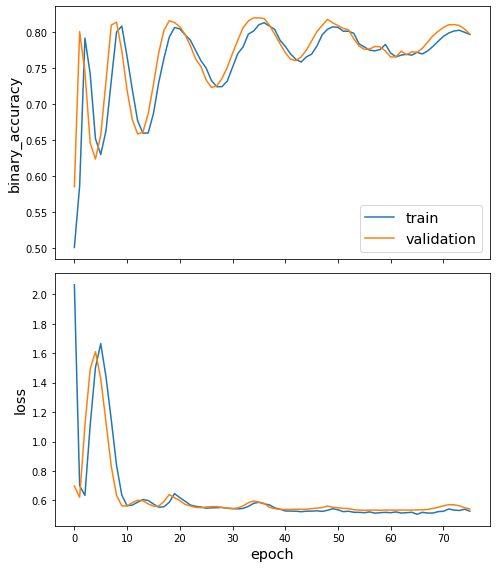

In [ ]:
plot_history(hist)

In [ ]:
embedding_generator = keras.Model(inputs=model.input, outputs=model.layers[5].output)

gen = FullBatchLinkGenerator(G, method="gcn")
flow = gen.flow(G2.edges, [1] * len((G2.edges)))

embeddings = embedding_generator.predict(flow)

df_gnn = pd.DataFrame(index = G2.nodes)
df_gnn['emb_gnn'] = list(embeddings[0])

df_gnn['BERT_reg'] = pd.Series(nx.get_node_attributes(G2, "f"))

Using GCN (local pooling) filters...
1/1 [==============================] - 0s 132ms/step


## link prediction da gnn


In [ ]:
from sklearn.metrics import classification_report
edges = []
for index,row in df_test.iterrows():
  user = str(row['user']) + ':user'
  item = str(row['item']) + ':item'

  edges.append((user,item))

for index,row in df_out.iterrows():
  user = str(row['user']) + ':user'
  item = str(row['item']) + ':item'

  edges.append((user,item))

y_true = [1] * len(df_test) + [0] * len(df_out)

flow = gen.flow(edges, y_true)

predicts = model.predict(flow)

preds = [1 if p > 0 else 0 for p in predicts[0]]

print(classification_report(y_true, preds, output_dict=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4764
           1       0.44      1.00      0.61      3764

    accuracy                           0.44      8528
   macro avg       0.22      0.50      0.31      8528
weighted avg       0.19      0.44      0.27      8528



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# One-Class Recommendation


In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM as OCSVM

def evaluation_one_class(preds_interest, preds_outliers):
    y_true = [1] * len(preds_interest) + [-1] * len(preds_outliers)
    y_pred = list(preds_interest) + list(preds_outliers)
    return print(classification_report(y_true, y_pred, output_dict=False))

def fast_result(column, nu):
  emb_train = []
  emb_test = []
  emb_out = []

  for item,row in df_train.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    emb_train.append(np.concatenate([df_gnn.loc[user][column], df_gnn.loc[item][column]]))

  for item,row in df_test.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    if user in G.nodes() and item in G.nodes():
      emb_test.append(np.concatenate([df_gnn.loc[user][column], df_gnn.loc[item][column]]))

  for item,row in df_out.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    if user in G.nodes() and item in G.nodes():
      emb_out.append(np.concatenate([df_gnn.loc[user][column], df_gnn.loc[item][column]]))

  one_class_classifier = OCSVM(nu=nu, kernel='rbf', gamma='auto').fit(emb_train)

  Y_pred_interest = one_class_classifier.predict(emb_test)
  Y_pred_ruido = one_class_classifier.predict(emb_out)

  evaluation_one_class(Y_pred_interest, Y_pred_ruido)

In [ ]:
fast_result('emb_gnn', 0.5)

              precision    recall  f1-score   support

          -1       0.62      0.64      0.63      4764
           1       0.53      0.51      0.52      3764

    accuracy                           0.58      8528
   macro avg       0.58      0.57      0.58      8528
weighted avg       0.58      0.58      0.58      8528



In [ ]:
fast_result('BERT_reg', 0.6)

              precision    recall  f1-score   support

          -1       0.56      0.64      0.60      4764
           1       0.45      0.37      0.40      3764

    accuracy                           0.52      8528
   macro avg       0.50      0.50      0.50      8528
weighted avg       0.51      0.52      0.51      8528



# Pipeline

In [ ]:
!git clone https://github.com/stellargraph/stellargraph.git

Cloning into 'stellargraph'...
remote: Enumerating objects: 22627, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 22627 (delta 37), reused 61 (delta 20), pack-reused 22531
Receiving objects: 100% (22627/22627), 93.44 MiB | 17.14 MiB/s, done.
Resolving deltas: 100% (14721/14721), done.


In [ ]:
cd stellargraph

/content/stellargraph


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/stellargraph (from -r requirements.txt (line 4))
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.2/385.2 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 KB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [ ]:
!gdown 1XFiH0-J1r9DepyhfAzQUCe8pIClddNHw
!gdown 1U-qJ0Aayp2srzlIxiztEpTjIolp9fWya
!gdown 163rDALChJadKYDgyQIDoXPxHzaKzR0gR

Downloading...
From: https://drive.google.com/uc?id=1XFiH0-J1r9DepyhfAzQUCe8pIClddNHw
To: /content/stellargraph/df_interest.pkl
100% 624k/624k [00:00<00:00, 80.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U-qJ0Aayp2srzlIxiztEpTjIolp9fWya
To: /content/stellargraph/df_outlier.pkl
100% 171k/171k [00:00<00:00, 50.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=163rDALChJadKYDgyQIDoXPxHzaKzR0gR
To: /content/stellargraph/movies_information_with_embeddings.pkl
100% 47.7M/47.7M [00:00<00:00, 105MB/s]


In [ ]:
import pandas as pd
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph import globalvar
from stellargraph import datasets
from tensorflow.keras.callbacks import EarlyStopping
from stellargraph.utils import plot_history
import tensorflow as tf
import stellargraph
from stellargraph import StellarGraph

df_int = pd.read_pickle('df_interest.pkl')
df_out = pd.read_pickle('df_outlier.pkl')
df_movies = pd.read_pickle('movies_information_with_embeddings.pkl')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM as OCSVM

def result_ocl_recommendation(ocsvm, emb_train, emb_test, emb_out):
  
  one_class_classifier = ocsvm.fit(emb_train)

  preds_interest = one_class_classifier.predict(emb_test)
  preds_outliers = one_class_classifier.predict(emb_out)

  y_true = [1] * len(preds_interest) + [-1] * len(preds_outliers)
  y_pred = list(preds_interest) + list(preds_outliers)

  return classification_report(y_true, y_pred, output_dict=True)

def reps_for_ocl(column, df_train, df_test, df_out, df_gnn, G):
  emb_train = []
  emb_test = []
  emb_out = []

  for item,row in df_train.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    emb_train.append(np.concatenate([df_gnn.loc[user][column], df_gnn.loc[item][column]]))

  for item,row in df_test.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    if user in G.nodes() and item in G.nodes():
      emb_test.append(np.concatenate([df_gnn.loc[user][column], df_gnn.loc[item][column]]))

  for item,row in df_out.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    if user in G.nodes() and item in G.nodes():
      emb_out.append(np.concatenate([df_gnn.loc[user][column], df_gnn.loc[item][column]]))

  return emb_train, emb_test, emb_out

def reps_for_ocl_movie(column, df_train, df_test, df_out, df_movie):
  emb_train = []
  emb_test = []
  emb_out = []

  users = df_train['user'].unique() 
  items = df_train['item'].unique() 

  for idx,row in df_train.iterrows():
    emb_train.append(df_movie[df_movie.movie_id == row['item']][column].iloc[0])

  for idx,row in df_test.iterrows():
    user = row['user']
    item = row['item']
    if user in users and item in items:
      emb_test.append(df_movie[df_movie.movie_id == row['item']][column].iloc[0])

  for idx,row in df_out.iterrows():
    user = row['user']
    item = row['item']

    if user in users and item in items:
      emb_out.append(df_movie[df_movie.movie_id == row['item']][column].iloc[0])

  return emb_train, emb_test, emb_out

In [ ]:
import random

def gcn_experimental_loop(G, EXPERIMENTAL_SEED, P_FRAC, epoch, patience, layer_sizes, activations, dropout, lr):

  edge_splitter_test = EdgeSplitter(G)

  G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
      p=P_FRAC, method="global", keep_connected=True,seed=EXPERIMENTAL_SEED
  )

  edge_splitter_train = EdgeSplitter(G_test)

  G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
      p=P_FRAC, method="global", keep_connected=True,seed=EXPERIMENTAL_SEED
  )

  train_gen = FullBatchLinkGenerator(G_train, method="gcn")
  train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

  test_gen = FullBatchLinkGenerator(G_test, method="gcn")
  test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

  gcn = GCN(
      layer_sizes=layer_sizes, activations=activations, generator=train_gen, dropout=dropout
  )

  x_inp, x_out = gcn.in_out_tensors()

  prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

  prediction = keras.layers.Reshape((-1,))(prediction)

  model = keras.Model(inputs=x_inp, outputs=prediction)

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=lr),
      loss=keras.losses.binary_crossentropy,
      metrics=[keras.metrics.BinaryAccuracy()],
  )

  init_train_metrics = model.evaluate(train_flow)
  init_test_metrics = model.evaluate(test_flow)

  es = EarlyStopping(monitor="loss", min_delta=0, patience=patience)

  model.fit(train_flow, epochs=epoch, validation_data=test_flow, verbose=0, shuffle=False, callbacks=[es])

  return model

def regularization(G, dim, embedding_feature: str = 'features', iterations=15, mi=1.0):

    nodes = []

    # inicializando vetor f para todos os nodes
    for node in G.nodes():
        G.nodes[node]['f'] = np.array([0.0]*dim)
        if embedding_feature in G.nodes[node]:
            G.nodes[node]['f'] = G.nodes[node][embedding_feature]*1.0
        nodes.append(node)

    random.seed(81)
    for iteration in range(iterations):
        random.shuffle(nodes)
        energy = 0.0

        # percorrendo cada node
        for node in nodes:
            f_new = np.array([0.0]*dim)
            f_old = np.array(G.nodes[node]['f'])*1.0
            sum_w = 0.0
            w = 1.0

            # percorrendo vizinhos do node
            for neighbor in G.neighbors(node):

                w /= np.sqrt(G.degree[neighbor])
                
                f_new = f_new + (w * G.nodes[neighbor]['f'])

                sum_w += w

            f_new /= sum_w

            G.nodes[node]['f'] = f_new*1.0

            if embedding_feature in G.nodes[node]:
                G.nodes[node]['f'] = G.nodes[node][embedding_feature] * \
                    mi + G.nodes[node]['f']*(1.0-mi)

            energy += np.linalg.norm(f_new-f_old)

        iteration += 1

    return G

In [ ]:
import numpy as np
import pandas as pd
from gc import collect
from sklearn.model_selection import KFold
from pathlib import Path
import networkx as nx

def train_test_split_ocl_recommendation(kf, df_int):
    train_test = []

    for train_index, test_index in kf.split(df_int):
        train_test.append((df_int.iloc[train_index], df_int.iloc[test_index]))
    
    return train_test

def foldValidation(folds):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    return kf

def generate_graph_enriched(df_train, df_movies):
  G = nx.Graph()

  for _,row in df_train.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    keywords = df_movies[df_movies.movie_id == int(row['item'])].keywords.iloc[0]  
    genres = df_movies[df_movies.movie_id == int(row['item'])].genres.iloc[0]
    review = df_movies[df_movies.movie_id == int(row['item'])].reviews.iloc[0]

    G.add_edge(user,item)
    G.add_edge(item, str(row['item'])+':review')
    for keyword in keywords:
      G.add_edge(item,keyword['name'] + ':keyword')
    
    for genre in genres:
      G.add_edge(item,genre['name'] + ':genre')

    
  for node in G.nodes:
    if 'item' in node:
      G.nodes[node]['features'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].overview_embedding.iloc[0]
      G.nodes[node]['type'] = 'item'
    elif 'review' in node:
      G.nodes[node]['features'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].review_embedding.iloc[0]
      G.nodes[node]['type'] = 'review'
    elif 'genre' in node:
      G.nodes[node]['type'] = 'genre'
    elif 'user' in node:
      G.nodes[node]['type'] = 'user'
    elif 'keyword' in node:
      G.nodes[node]['type'] = 'keyword'

  dim = len(df_movies.review_embedding.iloc[0])

  G2 = regularization(G, dim, iterations=5)

  for node in G2.nodes():
    if 'features' in G2.nodes[node]:
      G2.nodes[node]['f'] = G.nodes[node]['features']

  G3 = StellarGraph.from_networkx(G2,node_features='f')

  return G3, G2

def generate_original_graph(df_train, df_movies):
  G = nx.Graph()

  for _,row in df_train.iterrows():
    user = str(row['user']) + ':user'
    item = str(row['item']) + ':item'

    G.add_edge(user,item)
    
  for node in G.nodes:
    if 'item' in node:
      G.nodes[node]['features'] = df_movies[df_movies.movie_id == float(node.split(':')[0])].review_embedding.iloc[0]
      G.nodes[node]['type'] = 'item'
    elif 'user' in node:
      G.nodes[node]['type'] = 'user'

  dim = len(df_movies.review_embedding.iloc[0])

  G2 = regularization(G, dim, iterations=5)

  for node in G2.nodes():
    if 'features' in G2.nodes[node]:
      G2.nodes[node]['f'] = G.nodes[node]['features']

  G3 = StellarGraph.from_networkx(G2,node_features='f')

  return G3, G2
  
def write_results(l_values, file_name, line_parameters, path):
    if not Path(path + file_name).is_file():
        file_ = open(path + file_name, 'w')
        string = 'Parameters'

        for i in range(1,6):
            string += ';fold' + str(i)
        string += '\n'

        file_.write(string)
        file_.close()

    file_ = open(path + file_name, 'a')
    string = line_parameters

    for values in l_values:
        string += ';' + str(values)

    string += '\n'
    file_.write(string)
    file_.close()

In [ ]:
from sklearn.svm import OneClassSVM as OCSVM

epoch = 200

n_neurons = [[32], [64, 32]]

lrs = [0.001,0.0001]

dropouts = [0.3,0.4]

patiences = [20, 50]

activations = {1:[['tanh'], ['sigmoid']],
                2:[['tanh', 'tanh'], ['sigmoid', 'sigmoid']],
                3:[['tanh', 'tanh', 'tanh'], ['sigmoid', 'sigmoid', 'sigmoid']]}

layer_output_emb = {1: 5,
                    2: 7,
                    3: 9}

EXPERIMENTAL_SEED = 81
P_FRAC = 0.4

models = {
	'OCSVM_RBF_0.001_auto': OCSVM(kernel='rbf', nu=0.001, gamma='auto'),
	'OCSVM_RBF_0.005_auto': OCSVM(kernel='rbf', nu=0.005, gamma='auto'),
	'OCSVM_RBF_0.01_auto': OCSVM(kernel='rbf', nu=0.01, gamma='auto'),
	'OCSVM_RBF_0.05_auto': OCSVM(kernel='rbf', nu=0.05, gamma='auto'),
	'OCSVM_RBF_0.1_auto': OCSVM(kernel='rbf', nu=0.1, gamma='auto'),
	'OCSVM_RBF_0.2_auto': OCSVM(kernel='rbf', nu=0.2, gamma='auto'),
	'OCSVM_RBF_0.3_auto': OCSVM(kernel='rbf', nu=0.3, gamma='auto'),
	'OCSVM_RBF_0.4_auto': OCSVM(kernel='rbf', nu=0.4, gamma='auto'),
	'OCSVM_RBF_0.5_auto': OCSVM(kernel='rbf', nu=0.5, gamma='auto'),
	'OCSVM_RBF_0.6_auto': OCSVM(kernel='rbf', nu=0.6, gamma='auto'),
	'OCSVM_RBF_0.7_auto': OCSVM(kernel='rbf', nu=0.7, gamma='auto'),
	'OCSVM_sigmoid_0.001_auto': OCSVM(kernel='sigmoid', nu=0.001, gamma='auto'),
	'OCSVM_sigmoid_0.005_auto': OCSVM(kernel='sigmoid', nu=0.005, gamma='auto'),
	'OCSVM_sigmoid_0.01_auto': OCSVM(kernel='sigmoid', nu=0.01, gamma='auto'),
	'OCSVM_sigmoid_0.05_auto': OCSVM(kernel='sigmoid', nu=0.05, gamma='auto'),
	'OCSVM_sigmoid_0.1_auto': OCSVM(kernel='sigmoid', nu=0.1, gamma='auto'),
	'OCSVM_sigmoid_0.2_auto': OCSVM(kernel='sigmoid', nu=0.2, gamma='auto'),
	'OCSVM_sigmoid_0.3_auto': OCSVM(kernel='sigmoid', nu=0.3, gamma='auto'),
	'OCSVM_sigmoid_0.4_auto': OCSVM(kernel='sigmoid', nu=0.4, gamma='auto'),
	'OCSVM_sigmoid_0.5_auto': OCSVM(kernel='sigmoid', nu=0.5, gamma='auto'),
	'OCSVM_sigmoid_0.6_auto': OCSVM(kernel='sigmoid', nu=0.6, gamma='auto'),
	'OCSVM_sigmoid_0.7_auto': OCSVM(kernel='sigmoid', nu=0.7, gamma='auto'),
	'OCSVM_poly_0.001_auto': OCSVM(kernel='poly', nu=0.001, gamma='auto'),
	'OCSVM_poly_0.005_auto': OCSVM(kernel='poly', nu=0.005, gamma='auto'),
	'OCSVM_poly_0.01_auto': OCSVM(kernel='poly', nu=0.01, gamma='auto'),
	'OCSVM_poly_0.05_auto': OCSVM(kernel='poly', nu=0.05, gamma='auto'),
	'OCSVM_poly_0.1_auto': OCSVM(kernel='poly', nu=0.1, gamma='auto'),
	'OCSVM_poly_0.2_auto': OCSVM(kernel='poly', nu=0.2, gamma='auto'),
	'OCSVM_poly_0.3_auto': OCSVM(kernel='poly', nu=0.3, gamma='auto'),
	'OCSVM_poly_0.4_auto': OCSVM(kernel='poly', nu=0.4, gamma='auto'),
	'OCSVM_poly_0.5_auto': OCSVM(kernel='poly', nu=0.5, gamma='auto'),
	'OCSVM_poly_0.6_auto': OCSVM(kernel='poly', nu=0.6, gamma='auto'),
	'OCSVM_poly_0.7_auto': OCSVM(kernel='poly', nu=0.7, gamma='auto'),
	'OCSVM_linear_0.001_auto': OCSVM(kernel='linear', nu=0.001, gamma='auto'),
	'OCSVM_linear_0.005_auto': OCSVM(kernel='linear', nu=0.005, gamma='auto'),
	'OCSVM_linear_0.01_auto': OCSVM(kernel='linear', nu=0.01, gamma='auto'),
	'OCSVM_linear_0.05_auto': OCSVM(kernel='linear', nu=0.05, gamma='auto'),
	'OCSVM_linear_0.1_auto': OCSVM(kernel='linear', nu=0.1, gamma='auto'),
	'OCSVM_linear_0.2_auto': OCSVM(kernel='linear', nu=0.2, gamma='auto'),
	'OCSVM_linear_0.3_auto': OCSVM(kernel='linear', nu=0.3, gamma='auto'),
	'OCSVM_linear_0.4_auto': OCSVM(kernel='linear', nu=0.4, gamma='auto'),
	'OCSVM_linear_0.5_auto': OCSVM(kernel='linear', nu=0.5, gamma='auto'),
	'OCSVM_linear_0.6_auto': OCSVM(kernel='linear', nu=0.6, gamma='auto'),
	'OCSVM_linear_0.7_auto': OCSVM(kernel='linear', nu=0.7, gamma='auto')   
}

## run

### GNN enriched

In [ ]:
import warnings
warnings.simplefilter("ignore")

from tqdm.notebook import tqdm

folds = 5
kf = foldValidation(folds)
train_test = train_test_split_ocl_recommendation(kf, df_int)

file_name = 'GNN_enriched_OCSVM.csv'

path = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/One-Class Recommendation through Graph Neural Networks/AGORA VAI/results/'

pbar = tqdm(range(0, len(n_neurons)))

for i in pbar:
  n_neuron = n_neurons[i]
  for lr in lrs:
    for dropout in dropouts:
      for patience in patiences:
        for activation in activations[len(n_neuron)]:
          representations = []
          for df_train, df_test in train_test:
            G, G2 = generate_graph_enriched(df_train, df_movies)

            tf.random.set_seed(81)
            stellargraph.random.set_seed(81)

            model = gcn_experimental_loop(G, EXPERIMENTAL_SEED, P_FRAC, epoch, patience, n_neuron, activation, dropout, lr)

            embedding_generator = keras.Model(inputs=model.input, outputs=model.layers[layer_output_emb[len(n_neuron)]].output)

            gen = FullBatchLinkGenerator(G, method="gcn")
            flow = gen.flow(G2.edges, [1] * len((G2.edges)))

            embeddings = embedding_generator.predict(flow)

            df_gnn = pd.DataFrame(index = G2.nodes)
            df_gnn['emb_gnn'] = list(embeddings[0])
            x_train,x_test,x_outlier = reps_for_ocl('emb_gnn', df_train, df_test, df_out, df_gnn, G)
            representations.append((x_train,x_test,x_outlier))
            
          for model_cl in models.keys():
            ocsvm = models[model_cl]
            l_dicts = []
            for emb_train, emb_test, emb_out in representations:
              dic_result = result_ocl_recommendation(ocsvm, emb_train, emb_test, emb_out)
              l_dicts.append(dic_result)            

            parameters = str(n_neuron) + '_' + str(lr) + '_' + str(dropout) + '_' + str(patience) + '_' + str(activation) + '_' + str(model_cl)
            write_results(l_dicts, file_name, parameters, path)

### GNN original

In [ ]:
import warnings
warnings.simplefilter("ignore")

from tqdm.notebook import tqdm

folds = 5
kf = foldValidation(folds)
train_test = train_test_split_ocl_recommendation(kf, df_int)

file_name = 'GNN_original_OCSVM.csv'

path = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/One-Class Recommendation through Graph Neural Networks/AGORA VAI/results/'

pbar = tqdm(range(0, len(n_neurons)))

for i in pbar:
  n_neuron = n_neurons[i]
  for lr in lrs:
    for dropout in dropouts:
      for patience in patiences:
        for activation in activations[len(n_neuron)]:
          representations = []
          for df_train, df_test in train_test:
            G, G2 = generate_original_graph(df_train, df_movies)

            tf.random.set_seed(81)
            stellargraph.random.set_seed(81)

            model = gcn_experimental_loop(G, EXPERIMENTAL_SEED, P_FRAC, epoch, patience, n_neuron, activation, dropout, lr)

            embedding_generator = keras.Model(inputs=model.input, outputs=model.layers[layer_output_emb[len(n_neuron)]].output)

            gen = FullBatchLinkGenerator(G, method="gcn")
            flow = gen.flow(G2.edges, [1] * len((G2.edges)))

            embeddings = embedding_generator.predict(flow)

            df_gnn = pd.DataFrame(index = G2.nodes)
            df_gnn['emb_gnn'] = list(embeddings[0])
            x_train,x_test,x_outlier = reps_for_ocl('emb_gnn', df_train, df_test, df_out, df_gnn, G)
            representations.append((x_train,x_test,x_outlier))
            
          for model_cl in models.keys():
            ocsvm = models[model_cl]
            l_dicts = []
            for emb_train, emb_test, emb_out in representations:
              dic_result = result_ocl_recommendation(ocsvm, emb_train, emb_test, emb_out)
              l_dicts.append(dic_result)            

            parameters = str(n_neuron) + '_' + str(lr) + '_' + str(dropout) + '_' + str(patience) + '_' + str(activation) + '_' + str(model_cl)
            write_results(l_dicts, file_name, parameters, path)

### BERT original

In [ ]:
import warnings
warnings.simplefilter("ignore")

from tqdm.notebook import tqdm

folds = 5
kf = foldValidation(folds)
train_test = train_test_split_ocl_recommendation(kf, df_int)

file_name = 'BERT_regularized_original_OCSVM.csv'

path = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/One-Class Recommendation through Graph Neural Networks/AGORA VAI/results/'

representations = []

for df_train, df_test in train_test:
  G, G2 = generate_original_graph(df_train, df_movies)

  df_gnn = pd.DataFrame(index = G2.nodes)
  df_gnn['BERT_reg'] = pd.Series(nx.get_node_attributes(G2, "f"))

  x_train,x_test,x_outlier = reps_for_ocl('BERT_reg', df_train, df_test, df_out, df_gnn, G)
  representations.append((x_train,x_test,x_outlier))

for model_cl in models.keys():
  ocsvm = models[model_cl]
  l_dicts = []
  for emb_train, emb_test, emb_out in representations:
    dic_result = result_ocl_recommendation(ocsvm, emb_train, emb_test, emb_out)
    l_dicts.append(dic_result)            

  parameters = str(model_cl)
  write_results(l_dicts, file_name, parameters, path)

### BERT enriched

In [ ]:
path = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/One-Class Recommendation through Graph Neural Networks/AGORA VAI/results/'

folds = 5
kf = foldValidation(folds)
train_test = train_test_split_ocl_recommendation(kf, df_int)

file_name = 'BERT_regularized_enriched_OCSVM.csv'

representations = []

for df_train, df_test in train_test:
  G, G2 = generate_graph_enriched(df_train, df_movies)

  df_gnn = pd.DataFrame(index = G2.nodes)
  df_gnn['BERT_reg'] = pd.Series(nx.get_node_attributes(G2, "f"))

  x_train,x_test,x_outlier = reps_for_ocl('BERT_reg', df_train, df_test, df_out, df_gnn, G)
  representations.append((x_train,x_test,x_outlier))

for model_cl in models.keys():
  ocsvm = models[model_cl]
  l_dicts = []
  for emb_train, emb_test, emb_out in representations:
    dic_result = result_ocl_recommendation(ocsvm, emb_train, emb_test, emb_out)
    l_dicts.append(dic_result)            

  parameters = str(model_cl)
  write_results(l_dicts, file_name, parameters, path)

### BERT movie

In [ ]:
file_name = 'BERT_movie_OCSVM.csv'

representations = []

for df_train, df_test in train_test:
  x_train,x_test,x_outlier = reps_for_ocl_movie('review_embedding', df_train, df_test, df_out, df_movies)
  representations.append((x_train,x_test,x_outlier))

for model_cl in models.keys():
  ocsvm = models[model_cl]
  l_dicts = []
  for emb_train, emb_test, emb_out in representations:
    dic_result = result_ocl_recommendation(ocsvm, emb_train, emb_test, emb_out)
    l_dicts.append(dic_result)            

  parameters = str(model_cl)
  write_results(l_dicts, file_name, parameters, path)

### GNN - End to End 

In [ ]:
import warnings
warnings.simplefilter("ignore")

from tqdm.notebook import tqdm

folds = 5
kf = foldValidation(folds)
train_test = train_test_split_ocl_recommendation(kf, df_int)

file_name = 'GNN_e_ETE.csv'

path = '/content/drive/MyDrive/USP/Doctorate/Research/Articles/One-Class Recommendation through Graph Neural Networks/AGORA VAI/results/'

pbar = tqdm(range(0, len(n_neurons)))

for i in pbar:
  n_neuron = n_neurons[i]
  for lr in lrs:
    for dropout in dropouts:
      for patience in patiences:
        for activation in activations[len(n_neuron)]:
          l_dicts = []
          for df_train, df_test in train_test:
            G, G2 = generate_graph_enriched(df_train, df_movies)
            tf.random.set_seed(81)
            stellargraph.random.set_seed(81)
            model = gcn_experimental_loop(G, EXPERIMENTAL_SEED, P_FRAC, epoch, patience, n_neuron, activation, dropout, lr)

            edges = []
            for index,row in df_test.iterrows():
              user = str(row['user']) + ':user'
              item = str(row['item']) + ':item'
              if user in G2.nodes() and item in G2.nodes():
                edges.append([user,item])

            y_true = [1] * len(edges)

            for index,row in df_out.iterrows():
              user = str(row['user']) + ':user'
              item = str(row['item']) + ':item'
              if user in G2.nodes() and item in G2.nodes():
                edges.append([user,item])

            y_true = y_true + [0] * (len(edges)- len(y_true))

            gen = FullBatchLinkGenerator(G, method="gcn") 

            test_flow = gen.flow(edges, y_true)

            predicts = model.predict(test_flow)

            preds = [1 if p > 0.5 else 0 for p in predicts[0]]

            dic_result = classification_report(y_true, preds, output_dict=True)
            l_dicts.append(dic_result)   
          
          parameters = str(n_neuron) + '_' + str(lr) + '_' + str(dropout) + '_' + str(patience) + '_' + str(activation)
          write_results(l_dicts, file_name, parameters, path)

# Results Analisys

In [ ]:
def show_results(df_result):

  dic_avg = {'f1-score' : [[],[]],
                'recall' : [[],[]],
                'precision' : [[],[]],
                'accuracy' : [[],[]]}

  for index,row in df_result.iterrows():
    dic_result = {'f1-score' : [],
                'recall' : [],
                'precision' : [],
                'accuracy' : []}

    for i in range(1,6):
      fold = 'fold' + str(i)
      for metric in ['f1-score','recall', 'precision']:
        dic_result[metric].append(eval(row[fold])['weighted avg'][metric])
      dic_result['accuracy'].append(eval(row[fold])['accuracy'])

    for metric in ['f1-score','recall', 'precision', 'accuracy']:
      dic_avg[metric][0].append(np.mean(dic_result[metric]))
      dic_avg[metric][1].append(np.std(dic_result[metric]))

  for metric in ['f1-score','recall', 'precision', 'accuracy']:
    df_result[metric + '-mean'] = dic_avg[metric][0]
    df_result[metric + '-std'] = dic_avg[metric][1]

  f1_max = max(df_result['f1-score-mean'])

  return f1_max

## BERT-movie

In [ ]:
!gdown 1-0WN85lxuNiQOPRayx-WZneFS889QVa0

Downloading...
From: https://drive.google.com/uc?id=1-0WN85lxuNiQOPRayx-WZneFS889QVa0
To: /content/BERT_movie_OCSVM.csv
100% 118k/118k [00:00<00:00, 42.2MB/s]


In [ ]:
df_bert = pd.read_csv('BERT_movie_OCSVM.csv', sep=';')

f1_max = show_results(df_bert)

df_bert[df_bert['f1-score-mean'] == f1_max]

,Parameters,fold1,fold2,fold3,fold4,fold5,f1-score-mean,f1-score-std,recall-mean,recall-std,precision-mean,precision-std,accuracy-mean,accuracy-std
24,OCSVM_poly_0.01_auto,"{'-1': {'precision': 0.5929967013448363, 'reca...","{'-1': {'precision': 0.5964266946925907, 'reca...","{'-1': {'precision': 0.5674116798846431, 'reca...","{'-1': {'precision': 0.5797846304454234, 'reca...","{'-1': {'precision': 0.6000441696113075, 'reca...",0.527242,0.01436,0.536747,0.013341,0.540614,0.007164,0.536747,0.013341


## BERT regularized original

In [ ]:
!gdown 1A2B7tMxuklog2bg6U0zAyBqds2IAP5OC

Downloading...
From: https://drive.google.com/uc?id=1A2B7tMxuklog2bg6U0zAyBqds2IAP5OC
To: /content/BERT_regularized_original_OCSVM.csv
100% 118k/118k [00:00<00:00, 67.1MB/s]


In [ ]:
df_bert_ro = pd.read_csv('BERT_regularized_original_OCSVM.csv', sep=';')

f1_max = show_results(df_bert_ro)

df_bert_ro[df_bert_ro['f1-score-mean'] == f1_max]

,Parameters,fold1,fold2,fold3,fold4,fold5,f1-score-mean,f1-score-std,recall-mean,recall-std,precision-mean,precision-std,accuracy-mean,accuracy-std
9,OCSVM_RBF_0.6_auto,"{'-1': {'precision': 0.5673445894090561, 'reca...","{'-1': {'precision': 0.577639751552795, 'recal...","{'-1': {'precision': 0.5648283418553689, 'reca...","{'-1': {'precision': 0.5757519494987003, 'reca...","{'-1': {'precision': 0.5665124884366327, 'reca...",0.525504,0.006657,0.532328,0.00662,0.524692,0.006765,0.532328,0.00662


## BERT regularized enriched

In [ ]:
!gdown 1-9dg80EUBpgFhDDdTPjr8ZPmlvTVAkQr

Downloading...
From: https://drive.google.com/uc?id=1-9dg80EUBpgFhDDdTPjr8ZPmlvTVAkQr
To: /content/BERT_regularized_enriched_OCSVM.csv
100% 118k/118k [00:00<00:00, 73.4MB/s]


In [ ]:
df_bert_re = pd.read_csv('BERT_regularized_enriched_OCSVM.csv', sep=';')

f1_max = show_results(df_bert_re)

df_bert_re[df_bert_re['f1-score-mean'] == f1_max]

,Parameters,fold1,fold2,fold3,fold4,fold5,f1-score-mean,f1-score-std,recall-mean,recall-std,precision-mean,precision-std,accuracy-mean,accuracy-std
26,OCSVM_poly_0.1_auto,"{'-1': {'precision': 0.6095323741007195, 'reca...","{'-1': {'precision': 0.5810847274689692, 'reca...","{'-1': {'precision': 0.597444089456869, 'recal...","{'-1': {'precision': 0.6206715634837355, 'reca...","{'-1': {'precision': 0.6496547583308315, 'reca...",0.553176,0.020592,0.574356,0.015533,0.581534,0.009531,0.574356,0.015533


## GNN - original

In [ ]:
!gdown 1typHEm_IrNswgCRCu1E6oBv7dlLarE04

Downloading...
From: https://drive.google.com/uc?id=1typHEm_IrNswgCRCu1E6oBv7dlLarE04
To: /content/GNN_original_OCSVM.csv
100% 3.80M/3.80M [00:00<00:00, 210MB/s]


In [ ]:
df_gnn_o = pd.read_csv('GNN_original_OCSVM.csv', sep=';')

f1_max = show_results(df_gnn_o)

df_gnn_o[df_gnn_o['f1-score-mean'] == f1_max]

,Parameters,fold1,fold2,fold3,fold4,fold5,f1-score-mean,f1-score-std,recall-mean,recall-std,precision-mean,precision-std,accuracy-mean,accuracy-std
985,"[64, 32]_0.001_0.4_50_['tanh', 'tanh']_OCSVM_s...","{'-1': {'precision': 0.7511321531494443, 'reca...","{'-1': {'precision': 0.7579831932773109, 'reca...","{'-1': {'precision': 0.7509378907878282, 'reca...","{'-1': {'precision': 0.754094918101638, 'recal...","{'-1': {'precision': 0.7559038662486939, 'reca...",0.729873,0.001409,0.730134,0.001352,0.729727,0.00143,0.730134,0.001352
1007,"[64, 32]_0.001_0.4_50_['tanh', 'tanh']_OCSVM_l...","{'-1': {'precision': 0.7511321531494443, 'reca...","{'-1': {'precision': 0.7579831932773109, 'reca...","{'-1': {'precision': 0.7509378907878282, 'reca...","{'-1': {'precision': 0.754094918101638, 'recal...","{'-1': {'precision': 0.7559038662486939, 'reca...",0.729873,0.001409,0.730134,0.001352,0.729727,0.00143,0.730134,0.001352


## GNN -enriched

In [ ]:
!gdown 1R7fbdyIUGvpLsfD4iJFfayUfqZ_BZcpo

Downloading...
From: https://drive.google.com/uc?id=1R7fbdyIUGvpLsfD4iJFfayUfqZ_BZcpo
To: /content/GNN_enriched_OCSVM.csv
100% 3.80M/3.80M [00:00<00:00, 172MB/s]


In [ ]:
import pandas as pd
import numpy as np
df_gnn_e = pd.read_csv('GNN_enriched_OCSVM.csv', sep=';')

f1_max = show_results(df_gnn_e)

df_gnn_e[df_gnn_e['f1-score-mean'] == f1_max]['Parameters'].iloc[0
                                                                 ]

"[64, 32]_0.001_0.3_50_['tanh', 'tanh']_OCSVM_linear_0.3_auto"

## GNN-ETE

In [ ]:
!gdown 1-09M1PMcaMmzECNRFrI4IgNwZ7Z7UhLA

Downloading...
From: https://drive.google.com/uc?id=1-09M1PMcaMmzECNRFrI4IgNwZ7Z7UhLA
To: /content/GNN_ETE.csv
100% 79.5k/79.5k [00:00<00:00, 61.4MB/s]


In [ ]:
df_gnn_e_ete = pd.read_csv('GNN_ETE.csv', sep=';')

f1_max = show_results(df_gnn_e_ete)

df_gnn_e_ete[df_gnn_e_ete['f1-score-mean'] == f1_max]

,Parameters,fold1,fold2,fold3,fold4,fold5,f1-score-mean,f1-score-std,recall-mean,recall-std,precision-mean,precision-std,accuracy-mean,accuracy-std
2,[32]_0.001_0.3_50_['tanh'],"{'0': {'precision': 0.7165573444643212, 'recal...","{'0': {'precision': 0.771980172188886, 'recall...","{'0': {'precision': 0.7333906686734035, 'recal...","{'0': {'precision': 0.7843833185448092, 'recal...","{'0': {'precision': 0.7529595711413893, 'recal...",0.693091,0.014005,0.693619,0.013099,0.703157,0.004698,0.693619,0.013099
